In [1]:
import os
from PIL import Image

In [2]:
%matplotlib inline

import glob
import os
import re

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from PIL import Image

In [3]:
first_class_train =  'data/1class_train/'
second_class_train =  'data/2class_train/'
third_class_train =  'data/3class_train/'

first_class_test = 'data/1class_test/'
second_class_test = 'data/2class_test/'
third_class_test = 'data/3class_test/'

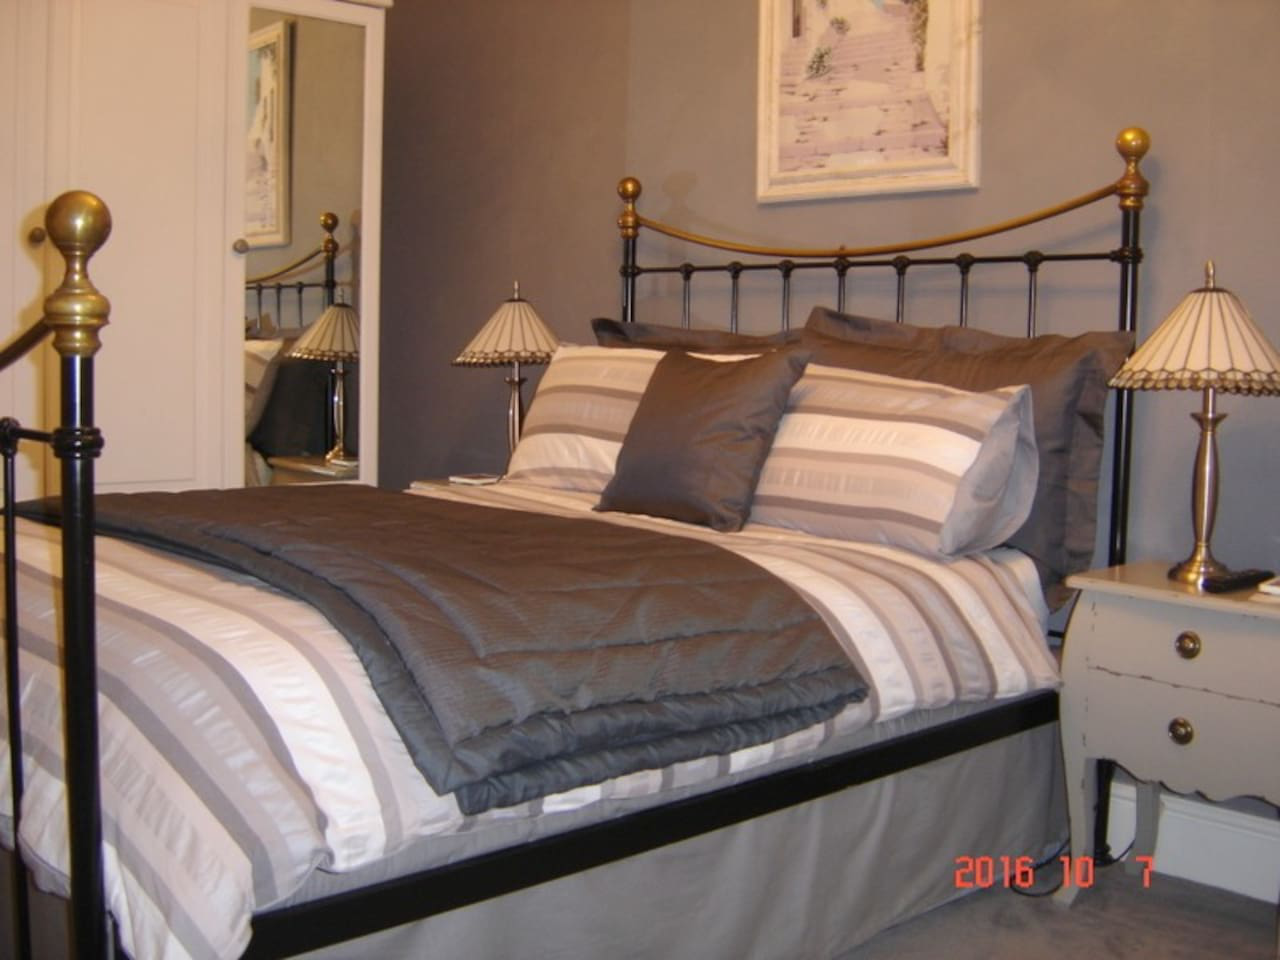

In [5]:
basewidth = 300
img = Image.open('./data/1class_test/214591.jpg')
img


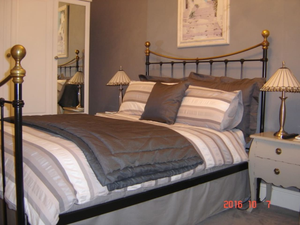

In [7]:
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
#img.save('resized.jpg') 
img

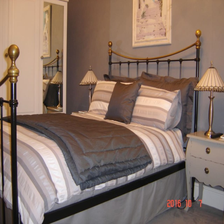

In [6]:
img_test = Image.open('./data/1class_test/214591.jpg')
img_test.resize((224,224), Image.ANTIALIAS)



In [8]:
np.array(norm_image(img_test)).shape

NameError: name 'norm_image' is not defined

In [9]:
def norm_image(img):
    """
    Normalize PIL image
    
    Normalizes luminance to (mean,std)=(0,1), and applies a [1%, 99%] contrast stretch
    """
    img_y, img_b, img_r = img.convert('YCbCr').split()
    
    img_y_np = np.asarray(img_y).astype(float)

    img_y_np /= 255
    img_y_np -= img_y_np.mean()
    img_y_np /= img_y_np.std()
    scale = np.max([np.abs(np.percentile(img_y_np, 1.0)),
                    np.abs(np.percentile(img_y_np, 99.0))])
    img_y_np = img_y_np / scale
    img_y_np = np.clip(img_y_np, -1.0, 1.0)
    img_y_np = (img_y_np + 1.0) / 2.0
    
    img_y_np = (img_y_np * 255 + 0.5).astype(np.uint8)

    img_y = Image.fromarray(img_y_np)

    img_ybr = Image.merge('YCbCr', (img_y, img_b, img_r))
    
    img_nrm = img_ybr.convert('RGB')
    
    return img_nrm

In [10]:
def imgToArray(image):
    x=image.convert('L')
    y=np.asarray(x.getdata(),dtype=np.float64).reshape((x.size[1],x.size[0]))
    y=np.asarray(y,dtype=np.uint8) 
    return y
    

In [11]:
def resize_image(img, size):

    n_x, n_y = img.size
    if n_y > n_x:
        n_y_new = size
        n_x_new = int(size * n_x / n_y + 0.5)
    else:
        n_x_new = size
        n_y_new = int(size * n_y / n_x + 0.5)

    img_res = img.resize((n_x_new, n_y_new), resample=PIL.Image.BICUBIC)

    img_pad = Image.new('RGB', (size, size), (128, 128, 128))
    ulc = ((size - n_x_new) // 2, (size - n_y_new) // 2)
    img_pad.paste(img_res, ulc)

    return img_pad



In [12]:
new_size = 224

def getImages_wo_resize(path):
    names = os.listdir(path)
    img_arr = []
    for name in names:
        p = path + name
        img = Image.open(p)
        img_arr.append(img)
    return img_arr

def getImages(path):
    names = os.listdir(path)
    img_arr = []
    for name in names:
        p = path + name
        img = Image.open(p)
        #print(p)
        img_arr.append(imgToArray(resize_image(norm_image(img), new_size)))
    return img_arr


def resize(img, size):
    #wpercent = basewidth / img.size[0]
    #hsize = int((float(img.size[1]) * float(wpercent)))
    #return img.resize((basewidth,hsize), Image.ANTIALIAS)
    return img.resize((size, size), Image.ANTIALIAS)

In [13]:
first_class_train_img = getImages(first_class_train)
second_class_train_img = getImages(second_class_train)
third_class_train_img = getImages(third_class_train)

first_class_test_img = getImages(first_class_test)
second_class_test_img = getImages(second_class_test)
third_class_test_img = getImages(third_class_test)

OSError: cannot identify image file 'data/1class_train/11934014.jpg'

In [59]:
len(first_class_train_img)

1000

In [60]:
second_class_test_img[9]

array([[182, 136, 134, ..., 231, 231, 240],
       [133, 136, 136, ..., 230, 230, 230],
       [142, 132, 130, ..., 230, 229, 228],
       ..., 
       [ 40,  40,  40, ...,  72,  70,  70],
       [ 44,  43,  40, ...,  72,  71,  71],
       [126,  44,  41, ...,  71,  71, 139]], dtype=uint8)

In [61]:
first_class_test_img[1]

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ..., 
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128]], dtype=uint8)

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

img_rows, img_cols = 224, 224 
first_class_train_img

[array([[128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        ..., 
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128]], dtype=uint8),
 array([[128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        ..., 
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128]], dtype=uint8),
 array([[128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        ..., 
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128]], dtype=uint8),
 array([[128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128,

In [63]:
first_class_test_img[0]

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ..., 
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128]], dtype=uint8)

In [84]:
# make (X_train, y_train), (X_test, y_test)


import numpy as np

X_train = np.array(first_class_train_img + second_class_train_img +third_class_train_img)
y_train = np.array([np.repeat(1, len(first_class_train_img))] +
                    [np.repeat(2, len(second_class_train_img))] +
                    [np.repeat(3, len(second_class_train_img))])

X_test = np.array(first_class_test_img+ second_class_test_img+ third_class_test_img)
y_test = np.array([np.repeat(1, len(first_class_test_img))] +
                    [np.repeat(2, len(second_class_test_img))] +
                    [np.repeat(3, len(second_class_test_img))])

                              
len_train = len(first_class_train_img) + len(second_class_train_img) + len(third_class_train_img)
print(len(first_class_train_img))
print(X_train.shape)
print(len_train)

#X_train  = X_train.reshape(len_train)
y_train = y_train.reshape(len_train)


len_test = len(first_class_test_img) + len(second_class_test_img) + len(third_class_test_img)
#X_test = X_test.reshape(len_test)
y_test = y_test.reshape(len_test)

y_test.shape

1000
(3000, 224, 224)
3000


(300,)

In [87]:
X_train.shape

(3000, 224, 224)

In [89]:
#theano

img_rows, img_cols = 224, 224


X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [94]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Convolution2D(20, 5, 5, border_mode='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(20, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
nb_epoch = 4

res = model.fit(X_train, Y_train, batch_size=128, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

Train on 3000 samples, validate on 300 samples
Epoch 1/4
3000/3000 [==============================] - 410s - loss: 1.1913 - acc: 0.3417 - val_loss: 1.1145 - val_acc: 0.3333
Epoch 2/4
3000/3000 [==============================] - 414s - loss: 1.1708 - acc: 0.3227 - val_loss: 1.1052 - val_acc: 0.3333
Epoch 3/4
3000/3000 [==============================] - 420s - loss: 1.1458 - acc: 0.3250 - val_loss: 1.1048 - val_acc: 0.3333
Epoch 4/4
3000/3000 [==============================] - 415s - loss: 1.1292 - acc: 0.3330 - val_loss: 1.1014 - val_acc: 0.3333


In [90]:


img_channels = 1

nb_filter = 20

model = Sequential()
model.add(Convolution2D(nb_filter, 3, 3, input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filter, 1, 3))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(1, 2)))
#model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dense(3))
#model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [91]:
X_train.shape

(3000, 1, 224, 224)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

x = range(nb_epoch)

plt.plot(x, res.history['acc'], label="train acc")
plt.plot(x, res.history['val_acc'], label="val acc")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, res.history['loss'], label="train loss")
plt.plot(x, res.history['val_loss'], label="val loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))